# Solving the n-Queens Problem using Local Search

Student Name: Rick Lattin

I have used the following AI tools: Github Copilot and ChatGPT3

I understand that my submission needs to be my own work: RL

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the fontsize to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Number of conflicts: 4
Board with 4 conflicts.


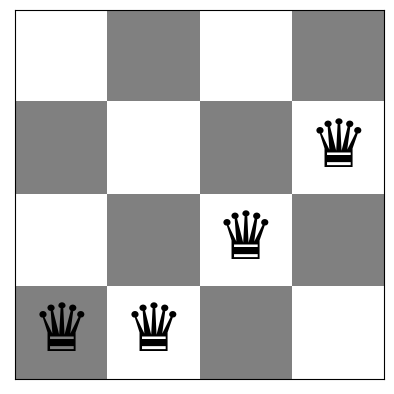

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [17]:
board = random_board(4)
print(f"Number of conflicts: {conflicts(board)}")

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


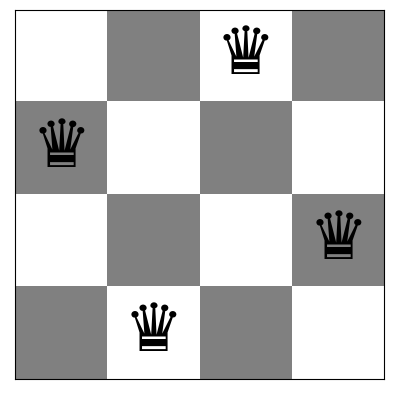

In [18]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [19]:
# Code and description go here

def steepest_acend_HCS(board):
    """Steepest acend hill climbing search"""

    current_state = board
    n = len(board)

    current_conflicts = conflicts(current_state)
    if current_conflicts == 0:
        return current_state

    while True:
        #saves best valued neighbor option (current state updates at the end of every run)
        best_nieghbor = current_state

        #tests each possible neighbor
        for i in range(n):
            for j in range(n):
                board_copy = list(current_state)
                if board[i] != j:
                    board_copy[i] = j
                    #if the neighbor being tested is better than the current best neighbor, it becomes the new best neighbor
                    if conflicts(board_copy) <= conflicts(best_nieghbor):
                        best_nieghbor = board_copy

        # ends when there is no longer a better neighbor state to move to from current position - could lead to local maxima
        if conflicts(best_nieghbor) >= conflicts(current_state):
            return current_state
        # otherwise, sets the current state to the new best state and repeats
        else:
            current_state = best_nieghbor

Number of conflicts: 8
Board with 8 conflicts.


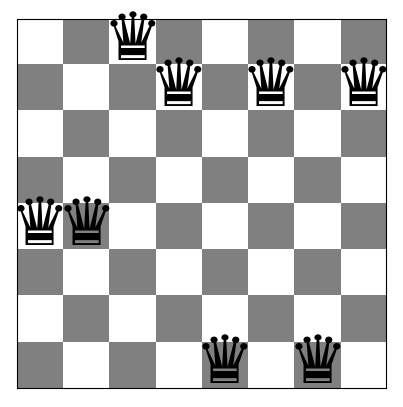

Number of conflicts: 1
Board with 1 conflicts.


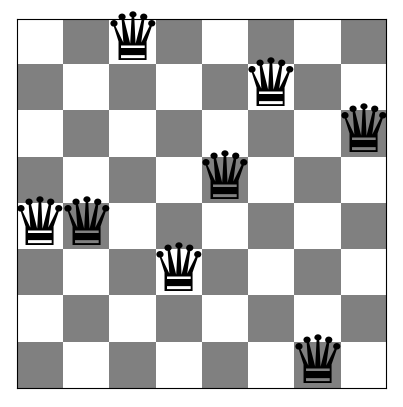

In [20]:
board = random_board(8)
print(f"Number of conflicts: {conflicts(board)}")
show_board(board)

new_board = steepest_acend_HCS(board)
print(f"Number of conflicts: {conflicts(new_board)}")
show_board(new_board)


## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [21]:
# Code and description go here

def stochastic1_HCS(board):
    """STochastic1 hill climbing search"""

    current_state = board
    n = len(board)

    current_conflicts = conflicts(current_state)
    if current_conflicts == 0:
        return current_state

    while True:
        #saves a better valued neighbor option (current state updates at the end of every run)
        next_nieghbor = current_state
        possible_neighbors = []

        # creates list of possible neighbors
        for i in range(n):
            for j in range(n):
                board_copy = list(current_state)
                if board[i] != j:
                    board_copy[i] = j
                    #if the neighbor being tested is better than the current next neighbor, it is added to the list of possible neighbors
                    if conflicts(board_copy) < conflicts(next_nieghbor): #changed <= to < to prevent random selection from ending early
                        possible_neighbors.append(board_copy)

        # pick a random neighbor from the list of possible neighbors
        if len(possible_neighbors) > 0:
            next_nieghbor = possible_neighbors[np.random.randint(0,len(possible_neighbors))]

        # ends when there is no longer a better neighbor state to move to from current position - could lead to local maxima
        if conflicts(next_nieghbor) >= conflicts(current_state):
            return current_state
        # otherwise, sets the current state to the new best state and repeats
        else:
            current_state = next_nieghbor

Number of conflicts: 8
Board with 8 conflicts.


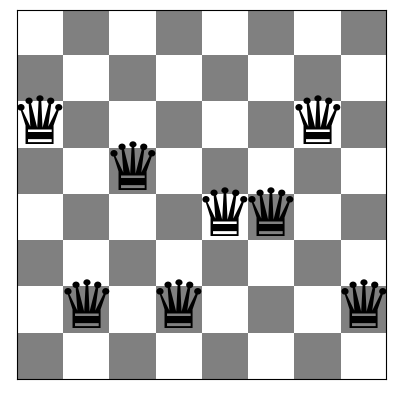

Number of conflicts: 1
Board with 1 conflicts.


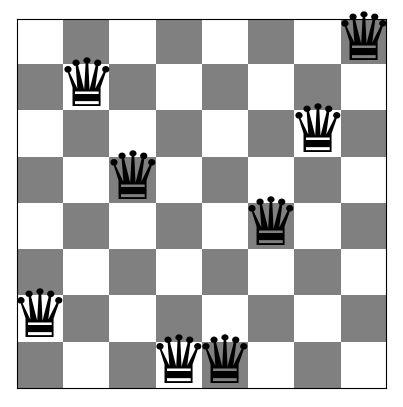

In [22]:
board = random_board(8)
print(f"Number of conflicts: {conflicts(board)}")
show_board(board)

new_board = stochastic1_HCS(board)
print(f"Number of conflicts: {conflicts(new_board)}")
show_board(new_board)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [23]:
# Code and description go here

def stochastic2_HCS(board):
    """STochastic2 hill climbing search"""

    current_state = board
    n = len(board)

    current_conflicts = conflicts(current_state)
    if current_conflicts == 0:
        return current_state

    while True:
        #saves a better valued neighbor option (current state updates at the end of every run)
        next_nieghbor = current_state
        counter = 0

        # tests n random neighbors
        while counter < (n*10):
            # picks a random neighbor to test
            test_x = np.random.randint(0,n)
            test_y = np.random.randint(0,n)
            while next_nieghbor[test_y] == test_x:
                test_x = np.random.randint(0,n)

            board_copy = list(next_nieghbor)
            board_copy[test_y] = test_x
            # if the neighbor is better than the current next neighbor, it becomes the new next neighbor
            if conflicts(board_copy) < conflicts(next_nieghbor):
                next_nieghbor = board_copy
                break
            counter += 1

        # determines there is a local maxima afeter n*10 iterations without improvement
        if counter == (n*10):
            return current_state
        else:
            current_state = next_nieghbor


Number of conflicts: 6
Board with 6 conflicts.


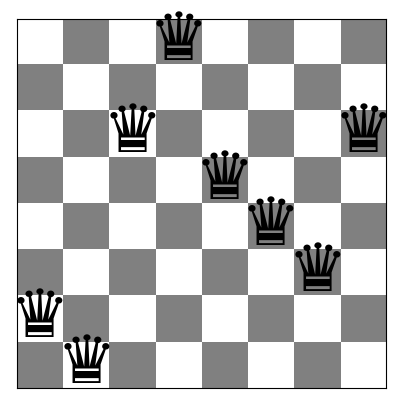

Number of conflicts: 3
Board with 3 conflicts.


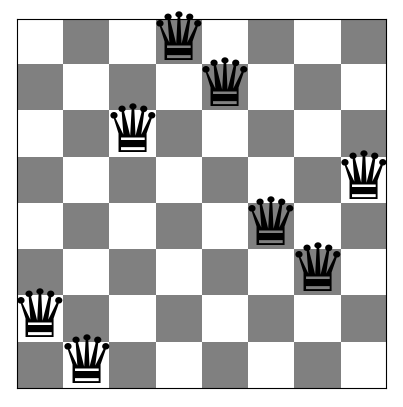

In [24]:
board = random_board(8)
print(f"Number of conflicts: {conflicts(board)}")
show_board(board)

new_board = stochastic2_HCS(board)
print(f"Number of conflicts: {conflicts(new_board)}")
show_board(new_board)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Board size: 16x16
Steepest Average: 2.04
Stochastic1 Average: 2.22
Stochastic2 Average: 2.53
Steepest Board Conflicts: 0
Board with 0 conflicts.


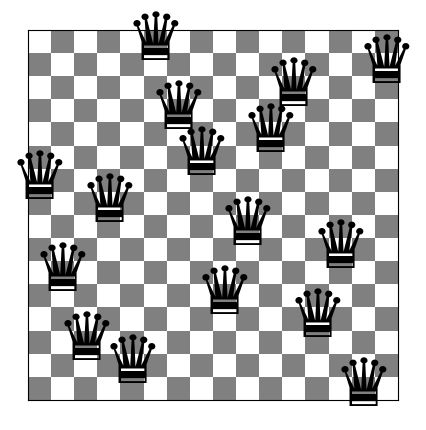

Stochastic1 Board Conflicts: 0
Board with 0 conflicts.


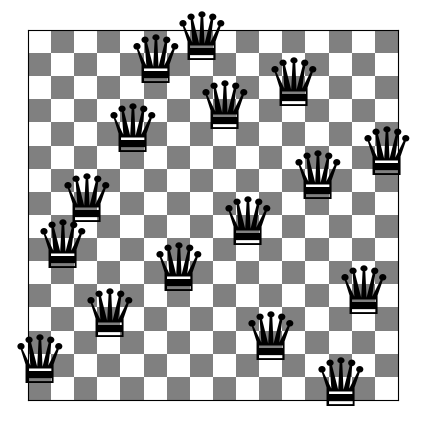

Stochastic2 Board Conflicts: 1
Board with 1 conflicts.


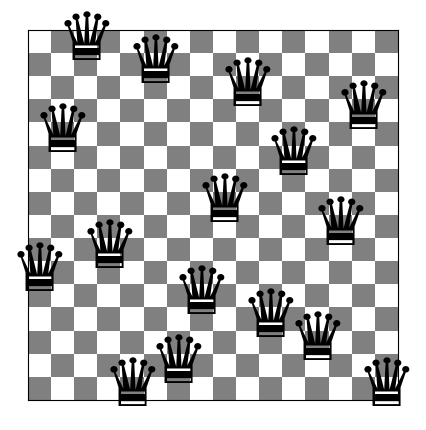

In [25]:
# Code and description go here
import pandas as pd

temp_board = random_board(16)

n = len(temp_board)

steepest_avg = 0
steepest_board = temp_board
stochastic1_avg = 0
stochastic1_board = temp_board
stochastic2_avg = 0
stochastic2_board = temp_board

for x in range(100):
    board = random_board(n)
    
    new_board = steepest_acend_HCS(board)
    steepest_avg = steepest_avg + conflicts(new_board)
    if conflicts(new_board) < conflicts(steepest_board):
        steepest_board = new_board

    new_board = stochastic1_HCS(board)
    stochastic1_avg = stochastic1_avg + conflicts(new_board)
    if conflicts(new_board) < conflicts(stochastic1_board):
        stochastic1_board = new_board

    new_board = stochastic2_HCS(board)
    stochastic2_avg = stochastic2_avg + conflicts(new_board)
    if conflicts(new_board) < conflicts(stochastic2_board):
        stochastic2_board = new_board

# not necessary just gets averages for reference
print(f"Board size: {n}x{n}")
print(f"Steepest Average: {steepest_avg/100}")
print(f"Stochastic1 Average: {stochastic1_avg/100}")
print(f"Stochastic2 Average: {stochastic2_avg/100}")

print(f"Steepest Board Conflicts: {conflicts(steepest_board)}")
show_board(steepest_board)
print(f"Stochastic1 Board Conflicts: {conflicts(stochastic1_board)}")
show_board(stochastic1_board)
print(f"Stochastic2 Board Conflicts: {conflicts(stochastic2_board)}")
show_board(stochastic2_board)


## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

#### I chose to go with a linear annealing schedule for the simulated annealing search method primarily due to its ease of use and predictablility in the context of this specific n queens problem. Since the state size of this problem has to remain relativley small due to timing restraints and we are required to define exactly how the schedule ends, it is beneficial to work with a schedule that is can easily understood in its application as to better assign an endpoint to the schedule. Furthermore, since there is no modeling or learning being implemented through our agents, it is not extremly necessary to use a more complex schedule. 

In [26]:
# Code and description go here

# Note: do bar chart for time and do a bar chart for number of conflicts, also possibly line graph for time

def simulated_annealing_schedule1(t):
    """Schedule 1 for simulated annealing"""
    if t == 100000:
        return 0

    return 1 / (t+1)

def simulated_annealing(board, schedule):
    """Simulated annealing"""

    current_state = board
    n = len(board)
    for i in range(10000000000000):


        T = schedule(i)
        if T == 0:
            return current_state
            
        possible_neighbor = list(current_state)

        # picks a random neighbor to test
        test_x = np.random.randint(0,n)
        test_y = np.random.randint(0,n)
        while possible_neighbor[test_y] == test_x:
            test_x = np.random.randint(0,n)

        # assigns radnom neighbor to possible neighbor
        possible_neighbor[test_y] = test_x

        # if the neighbor is better than the current next neighbor, it becomes the new next neighbor, otherwise there is a chance it will still become the new next neighbor
        value_difference = conflicts(current_state) - conflicts(possible_neighbor)
        if value_difference > 0: 
            current_state = possible_neighbor
        elif np.random.uniform() < np.exp(value_difference / T):
            current_state = possible_neighbor


In [27]:
# comparing performance of simulated annealing with different schedules
import pandas as pd
import time 

df = pd.DataFrame(columns = ["Algorithm", "Conflicts", "Run Time"])

steepest_acend_HCS_time = 0
stochastic1_HCS_time = 0
stochastic2_HCS_time = 0
simulated_annealing_time = 0

steepest_acend_HCS_conflicts = 0
stochastic1_HCS_conflicts = 0
stochastic2_HCS_conflicts = 0
simulated_annealing_conflicts = 0

for x in range(10):
    board = random_board(8)

    start_time = time.time()
    new_board = steepest_acend_HCS(board)
    end_time = time.time()
    steepest_acend_HCS_time = steepest_acend_HCS_time + (end_time - start_time)
    steepest_acend_HCS_conflicts = steepest_acend_HCS_conflicts + conflicts(new_board)

    start_time = time.time()
    new_board = stochastic1_HCS(board)
    end_time = time.time()
    stochastic1_HCS_time = stochastic1_HCS_time + (end_time - start_time)
    stochastic1_HCS_conflicts = stochastic1_HCS_conflicts + conflicts(new_board)

    start_time = time.time()
    new_board = stochastic2_HCS(board)
    end_time = time.time()
    stochastic2_HCS_time = stochastic2_HCS_time + (end_time - start_time)
    stochastic2_HCS_conflicts = stochastic2_HCS_conflicts + conflicts(new_board)

    start_time = time.time()
    new_board = simulated_annealing(board, simulated_annealing_schedule1)
    end_time = time.time()
    simulated_annealing_time = simulated_annealing_time + (end_time - start_time)
    simulated_annealing_conflicts = simulated_annealing_conflicts + conflicts(new_board)

df.loc[len(df.index)] = ["Steepest Acend HCS", steepest_acend_HCS_conflicts/10, steepest_acend_HCS_time/10]
df.loc[len(df.index)] = ["Stochastic1 HCS", stochastic1_HCS_conflicts/10, stochastic1_HCS_time/10]
df.loc[len(df.index)] = ["Stochastic2 HCS", stochastic2_HCS_conflicts/10, stochastic2_HCS_time/10]
df.loc[len(df.index)] = ["Simulated Annealing", simulated_annealing_conflicts/10, simulated_annealing_time/10]

print(df)

             Algorithm  Conflicts  Run Time
0   Steepest Acend HCS        1.4  0.005295
1      Stochastic1 HCS        1.8  0.007113
2      Stochastic2 HCS        1.4  0.004329
3  Simulated Annealing        0.0  2.882772


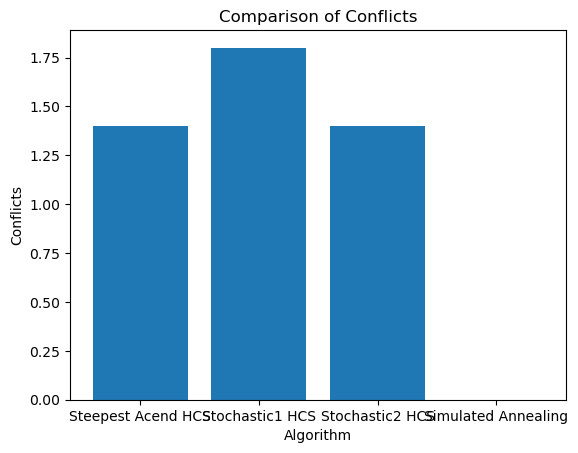

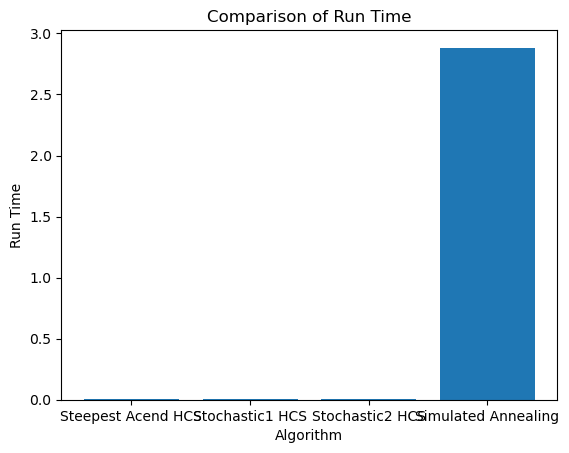

In [28]:
# plotting results of comparisons
import matplotlib.pyplot as plt

plt.bar(df["Algorithm"], df["Conflicts"])
plt.title("Comparison of Conflicts")
plt.xlabel("Algorithm")
plt.ylabel("Conflicts")
plt.show()

plt.bar(df["Algorithm"], df["Run Time"])
plt.title("Comparison of Run Time")
plt.xlabel("Algorithm")
plt.ylabel("Run Time")
plt.show()

Number of conflicts: 7
Board with 7 conflicts.


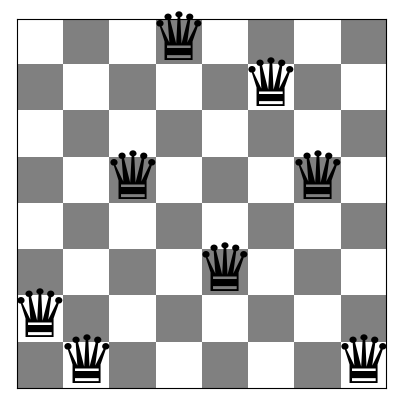

Number of conflicts: 0
Board with 0 conflicts.


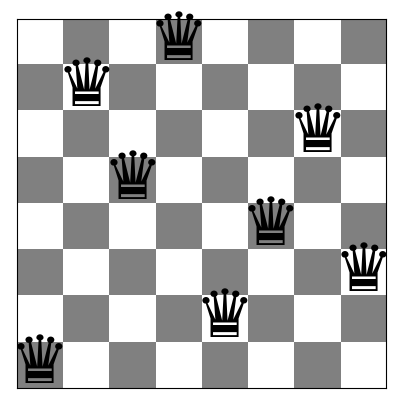

In [29]:
board = random_board(8)
print(f"Number of conflicts: {conflicts(board)}")
show_board(board)

new_board = simulated_annealing(board, simulated_annealing_schedule1)
print(f"Number of conflicts: {conflicts(new_board)}")
show_board(new_board)

## Task 6: Compare Performance [10 Points]

Use runtime and objective function value to compare the algorithms.

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

#### As can be seen through the charts/graphs displayed below, most of the algorithms scale beautifully with the problem size in terms of conflicts. The one exception to this being the stochastic2_HCS algorithm, which increases in the number of conflicts much quicker than the aformentioned algorithms. As for the scaling of run time, steepest_acend_HCS and stochastic1_HCS both scale poorly as they nearly begin to scale exponentially, simulated annealing scales at an acceptable, more linear rate, and stochastic2_HCS scales amazingly. The stochastic2_HCS algorithm shows almost no change in run time over the increase in board size. 

#### Finally, the largest board size that each algorithm can solve in a reasonable amount of time is 64 x 64. I doubled the size of the board with each increment and it took rouchly 13 minutes to run all 4 algorithms 10 times on a 64 x 64 board, and I consider that to be the upper bounds of "a reasonable amount of time". For each of the algorithms individually the maximum for steepest_acend was 100 x 100, for stochastic1_HCS it was 100 x 100 as well, for stochastic2_HCS it was 800 x 800, simulated_annealing it was 1000 x 1000. I incremented by 50 to test for each of the algorithms individually.

In [30]:
# Code, results, charts and discussion go here

board_sizes = [4,8,16,32,64]
all_dataframes = []

for n in board_sizes:
    df = pd.DataFrame(columns = ["Algorithm", "Conflicts", "Run Time"])

    steepest_acend_HCS_time = 0
    stochastic1_HCS_time = 0
    stochastic2_HCS_time = 0
    simulated_annealing_time = 0

    steepest_acend_HCS_conflicts = 0
    stochastic1_HCS_conflicts = 0
    stochastic2_HCS_conflicts = 0
    simulated_annealing_conflicts = 0

    for x in range(10):
        board = random_board(n)

        start_time = time.time()
        new_board = steepest_acend_HCS(board)
        end_time = time.time()
        steepest_acend_HCS_time = steepest_acend_HCS_time + (end_time - start_time)
        steepest_acend_HCS_conflicts = steepest_acend_HCS_conflicts + conflicts(new_board)

        start_time = time.time()
        new_board = stochastic1_HCS(board)
        end_time = time.time()
        stochastic1_HCS_time = stochastic1_HCS_time + (end_time - start_time)
        stochastic1_HCS_conflicts = stochastic1_HCS_conflicts + conflicts(new_board)

        start_time = time.time()
        new_board = stochastic2_HCS(board)
        end_time = time.time()
        stochastic2_HCS_time = stochastic2_HCS_time + (end_time - start_time)
        stochastic2_HCS_conflicts = stochastic2_HCS_conflicts + conflicts(new_board)

        start_time = time.time()
        new_board = simulated_annealing(board, simulated_annealing_schedule1)
        end_time = time.time()
        simulated_annealing_time = simulated_annealing_time + (end_time - start_time)
        simulated_annealing_conflicts = simulated_annealing_conflicts + conflicts(new_board)

    df.loc[len(df.index)] = ["Steepest Acend HCS", steepest_acend_HCS_conflicts/10, steepest_acend_HCS_time/10]
    df.loc[len(df.index)] = ["Stochastic1 HCS", stochastic1_HCS_conflicts/10, stochastic1_HCS_time/10]
    df.loc[len(df.index)] = ["Stochastic2 HCS", stochastic2_HCS_conflicts/10, stochastic2_HCS_time/10]
    df.loc[len(df.index)] = ["Simulated Annealing", simulated_annealing_conflicts/10, simulated_annealing_time/10]

    all_dataframes.append(df)

# create dataframes for each algorithm
steepest_acend_HCS_df = pd.DataFrame(columns = ["Board Size", "Conflicts", "Run Time"])
stochastic1_HCS_df = pd.DataFrame(columns = ["Board Size", "Conflicts", "Run Time"])
stochastic2_HCS_df = pd.DataFrame(columns = ["Board Size", "Conflicts", "Run Time"])
simulated_annealing_df = pd.DataFrame(columns = ["Board Size", "Conflicts", "Run Time"])

# add data to dataframes

for x in range(len(board_sizes)):
    steepest_acend_HCS_df.loc[len(steepest_acend_HCS_df.index)] = [board_sizes[x], all_dataframes[x].iloc[0]["Conflicts"], all_dataframes[x].iloc[0]["Run Time"]]
    stochastic1_HCS_df.loc[len(stochastic1_HCS_df.index)] = [board_sizes[x], all_dataframes[x].iloc[1]["Conflicts"], all_dataframes[x].iloc[1]["Run Time"]]
    stochastic2_HCS_df.loc[len(stochastic2_HCS_df.index)] = [board_sizes[x], all_dataframes[x].iloc[2]["Conflicts"], all_dataframes[x].iloc[2]["Run Time"]]
    simulated_annealing_df.loc[len(simulated_annealing_df.index)] = [board_sizes[x], all_dataframes[x].iloc[3]["Conflicts"], all_dataframes[x].iloc[3]["Run Time"]]

for x in range(len(board_sizes)):
    print("--------------------------------------------------")
    print(f"Board size: {board_sizes[x]}x{board_sizes[x]}")
    print(all_dataframes[x])


--------------------------------------------------
Board size: 4x4
             Algorithm  Conflicts  Run Time
0   Steepest Acend HCS        0.4  0.000542
1      Stochastic1 HCS        1.0  0.000640
2      Stochastic2 HCS        0.8  0.001209
3  Simulated Annealing        0.0  2.503438
--------------------------------------------------
Board size: 8x8
             Algorithm  Conflicts  Run Time
0   Steepest Acend HCS        1.3  0.004491
1      Stochastic1 HCS        1.1  0.006870
2      Stochastic2 HCS        1.8  0.002983
3  Simulated Annealing        0.1  2.854743
--------------------------------------------------
Board size: 16x16
             Algorithm  Conflicts  Run Time
0   Steepest Acend HCS        2.5  0.061442
1      Stochastic1 HCS        2.8  0.097889
2      Stochastic2 HCS        2.2  0.013408
3  Simulated Annealing        0.0  4.077658
--------------------------------------------------
Board size: 32x32
             Algorithm  Conflicts  Run Time
0   Steepest Acend HCS  

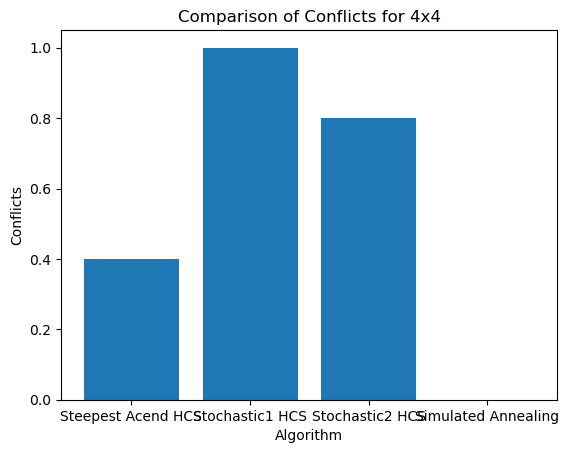

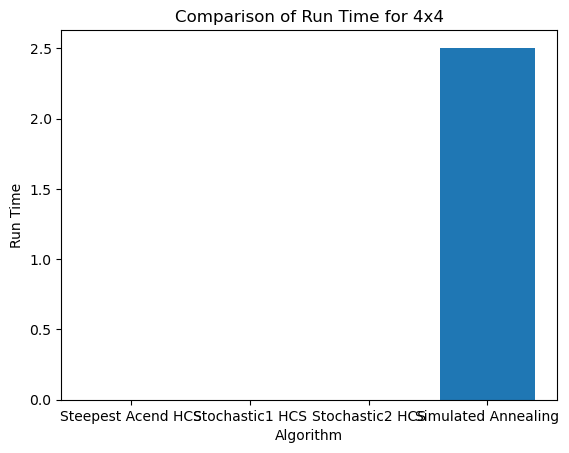

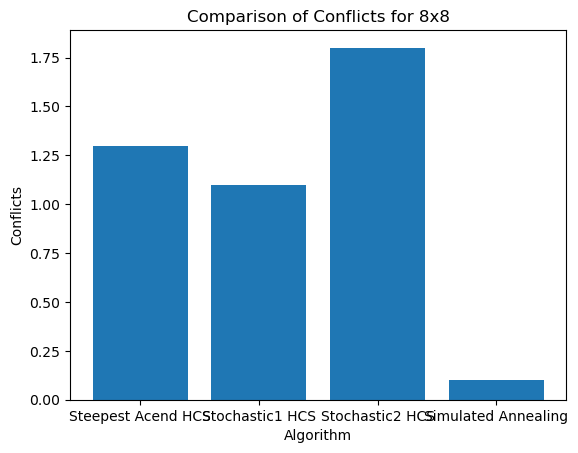

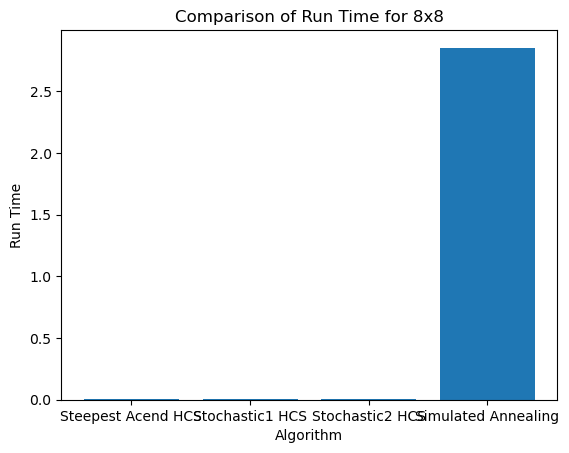

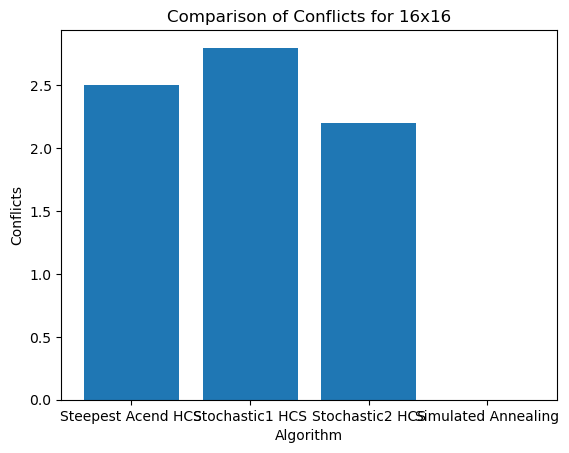

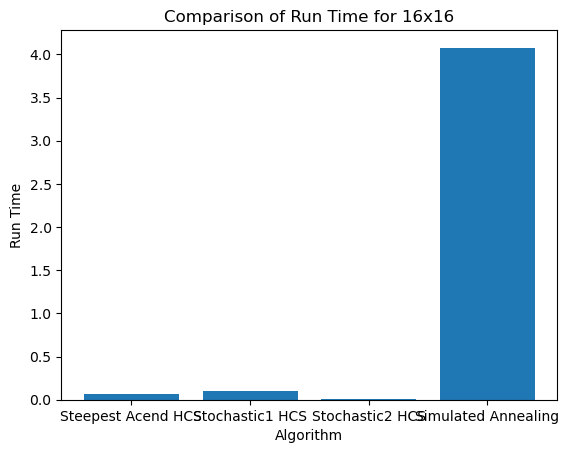

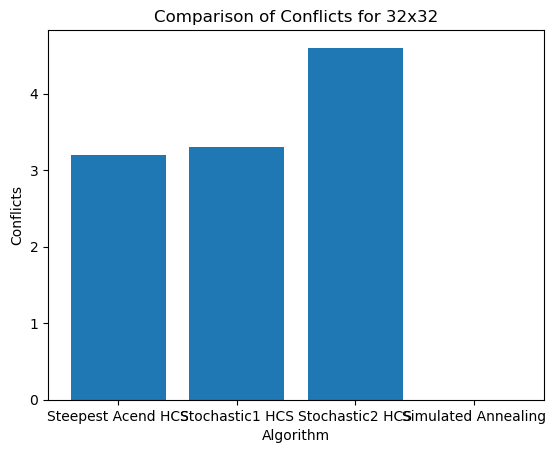

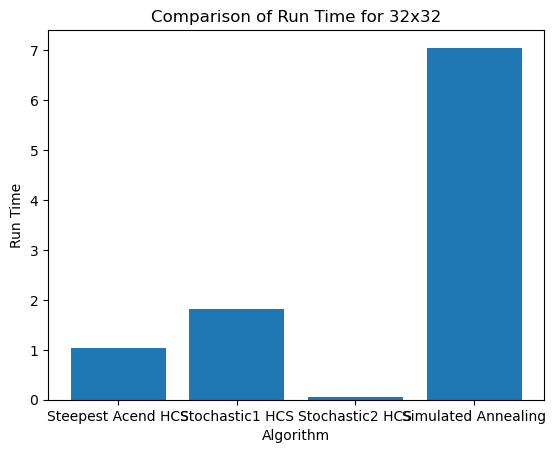

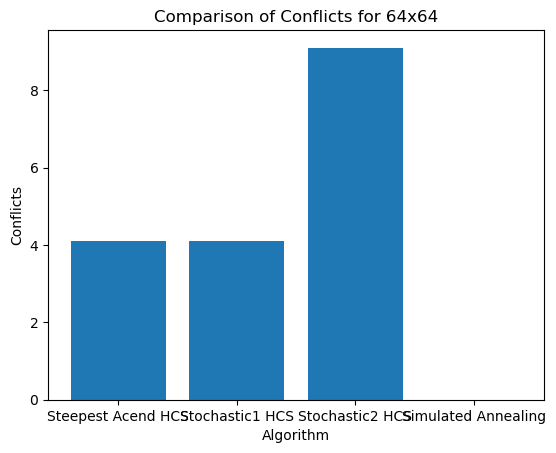

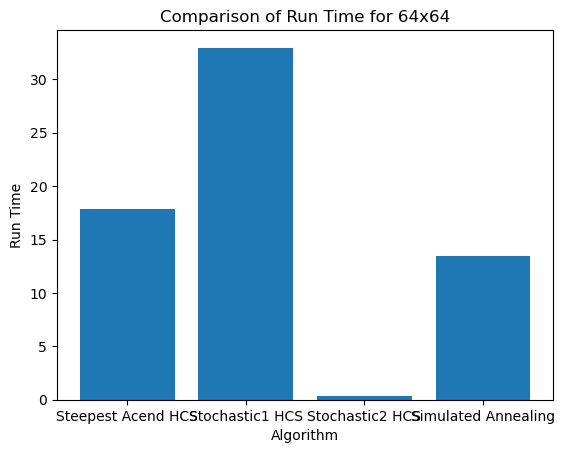

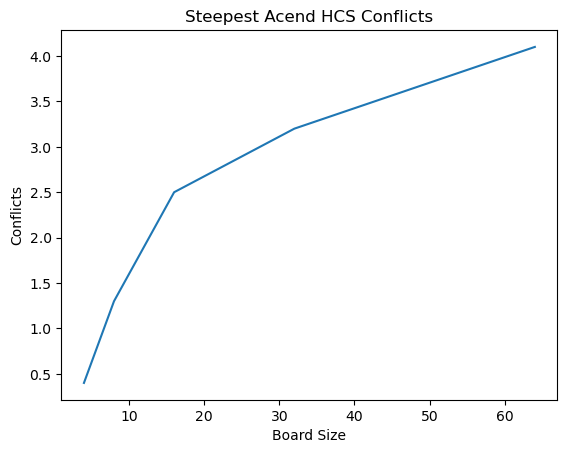

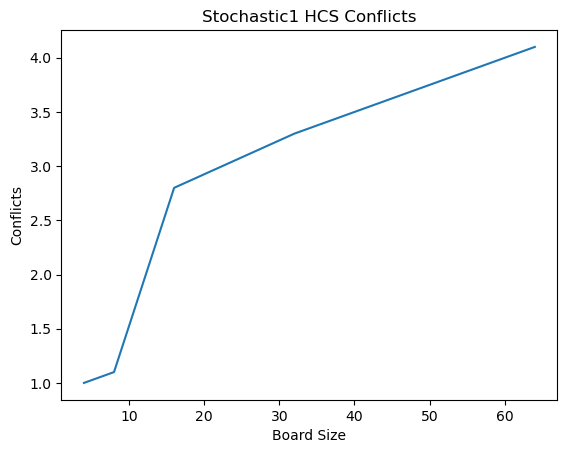

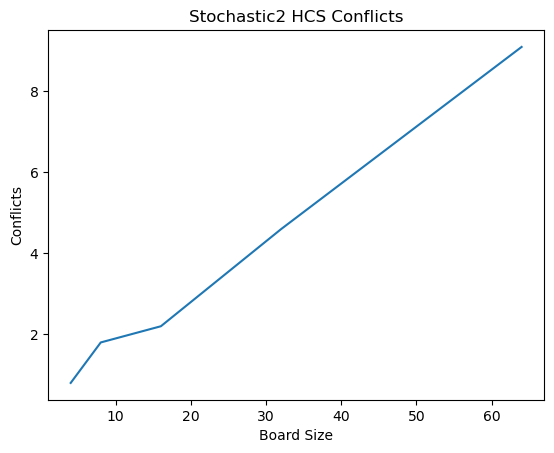

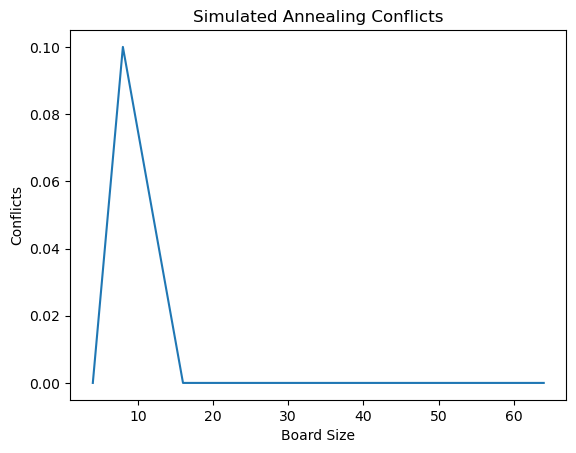

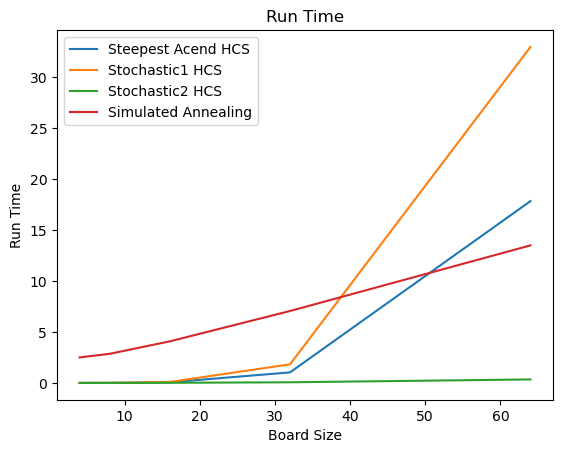

In [31]:
# plotting results of comparisons
import matplotlib.pyplot as plt

for x in range(len(board_sizes)):
    plt.bar(all_dataframes[x]["Algorithm"], all_dataframes[x]["Conflicts"])
    plt.title(f"Comparison of Conflicts for {board_sizes[x]}x{board_sizes[x]}")
    plt.xlabel("Algorithm")
    plt.ylabel("Conflicts")
    plt.show()

    plt.bar(all_dataframes[x]["Algorithm"], all_dataframes[x]["Run Time"])
    plt.title(f"Comparison of Run Time for {board_sizes[x]}x{board_sizes[x]}")
    plt.xlabel("Algorithm")
    plt.ylabel("Run Time")
    plt.show()

# plot line graphs for each algorithm based on conflicts
plt.plot(steepest_acend_HCS_df["Board Size"], steepest_acend_HCS_df["Conflicts"])
plt.title("Steepest Acend HCS Conflicts")
plt.xlabel("Board Size")
plt.ylabel("Conflicts")
plt.show()

plt.plot(stochastic1_HCS_df["Board Size"], stochastic1_HCS_df["Conflicts"])
plt.title("Stochastic1 HCS Conflicts")
plt.xlabel("Board Size")
plt.ylabel("Conflicts")
plt.show()

plt.plot(stochastic2_HCS_df["Board Size"], stochastic2_HCS_df["Conflicts"])
plt.title("Stochastic2 HCS Conflicts")
plt.xlabel("Board Size")
plt.ylabel("Conflicts")
plt.show()

plt.plot(simulated_annealing_df["Board Size"], simulated_annealing_df["Conflicts"])
plt.title("Simulated Annealing Conflicts")
plt.xlabel("Board Size")
plt.ylabel("Conflicts")
plt.show()

# plot one line graphs for all algorithms based on run time
plt.plot(steepest_acend_HCS_df["Board Size"], steepest_acend_HCS_df["Run Time"], label = "Steepest Acend HCS")
plt.plot(stochastic1_HCS_df["Board Size"], stochastic1_HCS_df["Run Time"], label = "Stochastic1 HCS")
plt.plot(stochastic2_HCS_df["Board Size"], stochastic2_HCS_df["Run Time"], label = "Stochastic2 HCS")
plt.plot(simulated_annealing_df["Board Size"], simulated_annealing_df["Run Time"], label = "Simulated Annealing")
plt.title("Run Time")
plt.xlabel("Board Size")
plt.ylabel("Run Time")
plt.legend()
plt.show()


## Graduate student advanced task: Exploring other Local Moves [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Implement a few different local moves. Implement:

* moving a queen only one square at a time
* switching two columns
* more moves which move more than one queen at a time.

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [32]:
# Code and description go here

# moving queen one space at a time

def one_space(board):
    """Moving Queen One Space at a Time"""

    current_state = board
    n = len(board)

    current_conflicts = conflicts(current_state)
    if current_conflicts == 0:
        return current_state

    while True:
        #saves best valued neighbor option (current state updates at the end of every run)
        best_nieghbor = current_state

        #tests each possible neighbor
        for i in range(n):
            for j in range(n):
                board_copy = list(current_state)
                if board[i] != j and (board[i] == (j+1) or board[i] == (j-1)):
                    board_copy[i] = j
                    #if the neighbor being tested is better than the current best neighbor, it becomes the new best neighbor
                    if conflicts(board_copy) <= conflicts(best_nieghbor):
                        best_nieghbor = board_copy

        # ends when there is no longer a better neighbor state to move to from current position - could lead to local maxima
        if conflicts(best_nieghbor) >= conflicts(current_state):
            return current_state
        # otherwise, sets the current state to the new best state and repeats
        else:
            current_state = best_nieghbor

In [33]:
# switching two columns with each other

def switching_columns(board):
    """Switching Columns"""

    current_state = board
    n = len(board)

    current_conflicts = conflicts(current_state)
    if current_conflicts == 0:
        return current_state

    while True:
        #saves best valued neighbor option (current state updates at the end of every run)
        best_nieghbor = current_state

        #tests each possible neighbor
        for i in range(n):
            for j in range(n):
                board_copy = list(current_state)
                if i != j:
                    temp = board_copy[i]
                    board_copy[i] = board_copy[j]
                    board_copy[j] = temp
                    #if the neighbor being tested is better than the current best neighbor, it becomes the new best neighbor
                    if conflicts(board_copy) <= conflicts(best_nieghbor):
                        best_nieghbor = board_copy

        # ends when there is no longer a better neighbor state to move to from current position - could lead to local maxima
        if conflicts(best_nieghbor) >= conflicts(current_state):
            return current_state
        # otherwise, sets the current state to the new best state and repeats
        else:
            current_state = best_nieghbor

In [34]:
# making multiple moves at a time

def multiple_moves(board):
    """Making multiple moves at a time"""

    current_state = board
    n = len(board)

    current_conflicts = conflicts(current_state)
    if current_conflicts == 0:
        return current_state

    while True:
        #saves a better valued neighbor option (current state updates at the end of every run)
        next_nieghbor = current_state
        counter = 0

        # tests n random neighbors
        while counter < (n*20):
            # picks a random neighbor to test that has two moves
            test_x1 = np.random.randint(0,n)
            test_y1 = np.random.randint(0,n)
            while next_nieghbor[test_y1] == test_x1:
                test_x1 = np.random.randint(0,n)

            test_x2 = np.random.randint(0,n)
            test_y2 = np.random.randint(0,n)
            while next_nieghbor[test_y2] == test_x2 or (test_y1 == test_y2 and test_x1 == test_x2):
                test_x2 = np.random.randint(0,n)

            board_copy = list(next_nieghbor)
            board_copy[test_y1] = test_x1
            board_copy[test_y2] = test_x2

            # if the neighbor is better than the current next neighbor, it becomes the new next neighbor
            if conflicts(board_copy) < conflicts(next_nieghbor):
                next_nieghbor = board_copy
                break
            counter += 1

        # determines there is a local maxima afeter n*10 iterations without improvement
        if counter == (n*20):
            return current_state
        else:
            current_state = next_nieghbor

In [35]:
# comparing performance of simulated annealing with different schedules
import pandas as pd
import time 

df = pd.DataFrame(columns = ["Algorithm", "Conflicts", "Run Time"])


stochastic2_HCS_time = 0
one_space_time = 0
switching_columns_time = 0
multiple_moves_time = 0

stochastic2_HCS_conflicts = 0
one_space_conflicts = 0
switching_columns_conflicts = 0
multiple_moves_conflicts = 0

for x in range(10):
    board = random_board(8)

    start_time = time.time()
    new_board = stochastic2_HCS(board)
    end_time = time.time()
    stochastic2_HCS_time = stochastic2_HCS_time + (end_time - start_time)
    stochastic2_HCS_conflicts = stochastic2_HCS_conflicts + conflicts(new_board)

    start_time = time.time()
    new_board = one_space(board)
    end_time = time.time()
    one_space_time = one_space_time + (end_time - start_time)
    one_space_conflicts = one_space_conflicts + conflicts(new_board)

    start_time = time.time()
    new_board = switching_columns(board)
    end_time = time.time()
    switching_columns_time = switching_columns_time + (end_time - start_time)
    switching_columns_conflicts = switching_columns_conflicts + conflicts(new_board)

    start_time = time.time()
    new_board = multiple_moves(board)
    end_time = time.time()
    multiple_moves_time = multiple_moves_time + (end_time - start_time)
    multiple_moves_conflicts = multiple_moves_conflicts + conflicts(new_board)


df.loc[len(df.index)] = ["Stochastic2 HCS", stochastic2_HCS_conflicts/10, stochastic2_HCS_time/10]
df.loc[len(df.index)] = ["One Space", one_space_conflicts/10, one_space_time/10]
df.loc[len(df.index)] = ["Switching Columns", switching_columns_conflicts/10, switching_columns_time/10]
df.loc[len(df.index)] = ["Multiple Moves", multiple_moves_conflicts/10, multiple_moves_time/10]

print(df)

           Algorithm  Conflicts  Run Time
0    Stochastic2 HCS        1.3  0.004339
1          One Space        4.2  0.001291
2  Switching Columns        4.5  0.003652
3     Multiple Moves        1.6  0.010348


## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [36]:
# Code and description go here